# Figure preparation 

In [15]:
# set the envoiroment
import cobra
from cobra import Model, Reaction, Metabolite
from cobra.flux_analysis import flux_variability_analysis
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob
import escher
from escher import Builder
from utils import show_map
from utils.check_precursor_problem import check_precursor_problem

## Figure S2

In [3]:
x = np.linspace(0,1,401)
figure_S5 = pd.DataFrame({"X":x})
figure_S5["-Jp/L∆Gc"] = 0
figure_S5["Jc/L∆Gc"] = 0
figure_S5["-Jp/Jc"] = 0
figure_S5["Jp1/Jp"] = 0
figure_S5["Jp2/Jp"] = 0
figure_S5["n"] = 0
figure_S5["η"] = 0
φ = 0.2
n1 = 1
n2 = 2
L2= 1
L1=1
for i in range(len(figure_S5)):
    # The formula -Jp/(L∆Gc)= (111-φ)∙n1∙(1-n1∙X)+φ∙n2-φ∙(n2 )^2∙X was used for calculation of -Jp/(L∆Gc).
    figure_S5["-Jp/L∆Gc"].iloc[i] = (1-φ)*n1*(1-n1*figure_S5["X"].iloc[i]) + φ*n2*(1-n2*figure_S5["X"].iloc[i])
    # The formula Jc/(L∆Gc)= (1-φ)∙(1-n1∙X)+φ∙(1-n2∙X) was used for calculations of Jc/(L∆Gc).
    figure_S5["Jc/L∆Gc"].iloc[i] = (1-φ)*(1-n1*figure_S5["X"].iloc[i]) + φ*(1-n2*figure_S5["X"].iloc[i])
    # The formula -Jp/Jc = (-Jp/L∆Gc)/(Jc/L∆Gc) was used for calculation of -Jp/Jc.
    figure_S5["-Jp/Jc"].iloc[i] = (figure_S5["-Jp/L∆Gc"].iloc[i])/(figure_S5["Jc/L∆Gc"].iloc[i])
    # The formula -Jp1/Jp =(1-φ)∙n1∙(1-n1∙X)/(-Jp/L∆Gc) was used for calculation of -Jp1/Jp.
    figure_S5["Jp1/Jp"].iloc[i] = (1-φ)*n1*(1-n1*figure_S5["X"].iloc[i])/figure_S5["-Jp/L∆Gc"].iloc[i]
   # The formula -Jp2/Jp =φ∙n2∙(1-n2∙X)/(-Jp/L∆Gc) was used for calculation of -Jp2/Jp
    figure_S5["Jp2/Jp"].iloc[i] = φ*n2*(1-n2*figure_S5["X"].iloc[i])/figure_S5["-Jp/L∆Gc"].iloc[i]
    # The formula n = ((1-φ)∙n1∙(1-n1∙X)+φ∙n2∙(1-n_2∙X))/((1-φ)∙(1-n1∙X)+φ∙(1-n2∙X)) was used for calculation of n.
    figure_S5["n"].iloc[i] = ((1-φ)*n1*(1-n1*figure_S5["X"].iloc[i])+φ*n2*(1-n2*figure_S5["X"].iloc[i]))/((1-φ)*(1-n1*figure_S5["X"].iloc[i])+φ*(1-n2*figure_S5["X"].iloc[i]))
    # The formula η = -Jp/Jc∙X was used to caluculate of η.
    figure_S5["η"].iloc[i] = figure_S5["-Jp/Jc"].iloc[i]*figure_S5["X"].iloc[i]

C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\pandas\core\indexing.py:205 SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\ipykernel_launcher.py:23 RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\ipykernel_launcher.py:25 RuntimeWarning: divide by zero encountered in double_scalars


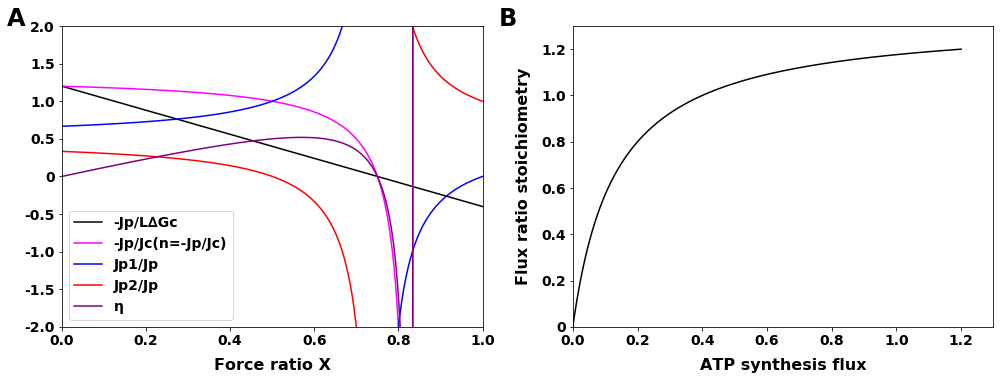

In [4]:
import matplotlib
import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(8, 6), sharey=True)
# fig.subplots_adjust(bottom=0.6, right=0.8)
matplotlib.rcParams.update({'font.size':14,'font.weight':"bold"})
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (14,5.5))
formatter = matplotlib.ticker.FormatStrFormatter('%1.3f')#This one is used to set the accurate of y axis
# ax.yaxis.set_major_formatter(formatter)
ax1.plot(figure_S5["X"],figure_S5["-Jp/L∆Gc"],color='black',label = "-Jp/L∆Gc")
ax1.plot(figure_S5["X"],figure_S5["-Jp/Jc"],color='magenta',label = "-Jp/Jc(n=-Jp/Jc)")
ax1.plot(figure_S5["X"],figure_S5["Jp1/Jp"],color='blue',label = "Jp1/Jp")
ax1.plot(figure_S5["X"],figure_S5["Jp2/Jp"],color='red',label = "Jp2/Jp")
# ax.plot(figure_S5["X"],figure_S5["n"],color='green',label = "n")
ax1.plot(figure_S5["X"],figure_S5["η"],color='purple',label = "η")

ax1.legend(prop={"size":14}, loc='lower left', borderaxespad=0.5)

ax1.set_yticklabels(["-2.0","-1.5","-1.0","-0.5","0","0.5","1.0","1.5","2.0"],fontsize = 14,fontweight = "bold")
# ax1.xticks(fontsize = 14,fontweight = "bold")
ax1.text(-0.13, 2, 'A',  fontsize = 24, color ="black")
ax1.set_ylim(-2.0, 2)
ax1.set_xlim (0,1.0)
ax1.set_xlabel("Force ratio X", fontsize = 16, fontweight = "bold",labelpad=10)

ax2.plot(figure_S5["-Jp/L∆Gc"],figure_S5["n"],color='black')
ax2.set_yticklabels(["0","0.2","0.4","0.6","0.8","1.0","1.2","1.3"],fontsize = 14,fontweight = "bold")
# ax2.xticks(fontsize = 14,fontweight = "bold")
ax2.text(-0.23, 1.3, 'B',  fontsize = 24, color ="black")
ax2.set_ylim(0.0, 1.3)
ax2.set_xlim (0,1.3)
ax2.set_xlabel("ATP synthesis flux", fontsize = 16, fontweight = "bold",labelpad=10)
ax2.set_ylabel("Flux ratio stoichiometry", fontsize = 16, fontweight = "bold",labelpad=10)
plt.tight_layout()
plt.savefig('../figures/Figure S5', dpi=300)
plt.show()

## Figure 2 and Figure S3

In [5]:
x = np.linspace(0,1,401)
figure_S6 = pd.DataFrame({"X":x})
figure_S6["n/(-Jp/LΔGc) for Z = 0.5"] = 0
figure_S6["n/(-Jp/LΔGc) for Z = 1"] = 0
figure_S6["n/(-Jp/LΔGc) for Z = 2"] = 0
figure_S6["n/(-Jp/LΔGc) for Z = 4"] = 0
figure_S6["n/(-Jp/LΔGc total)"] = 0
figure_S6["n/(-Jp/LΔGc) for Optimal Z = q/2X"] = 0



figure_S6["-Jp/LΔGc for Z = 0.5"] = 0
figure_S6["-Jp/LΔGc for Z = 1"] = 0
figure_S6["-Jp/LΔGc for Z = 2"] = 0
figure_S6["-Jp/LΔGc for Z = 4"] = 0
figure_S6["-Jp/LΔGc total"] = 0
figure_S6["-Jp/LΔGc for Optimal Z = q/2X"] = 0
# figure_S6["Z(maximal ATP syntheis flux) = q/2X"] = 0

figure_S6["-Jp/Jc for Z = 0.5"] = 0
figure_S6["-Jp/Jc for Z = 1"] = 0
figure_S6["-Jp/Jc for Z = 2"] = 0
figure_S6["-Jp/Jc for Z = 4"] = 0
figure_S6["-Jp/Jc total"] = 0
figure_S6["-Jp/Jc for Optimal Z = q/2X"] = 0
# figure_S6["Z(maximal ATP syntheis flux) = q/2X"] = 0
q = 0.9
Z1 = 0.5
Z2 = 1
Z3 = 2
Z4 = 4
for i in range(len(figure_S6)):
    # The formula -Jp/L∆Gc= L∙∆Gc∙q∙z∙(1-z/q∙X)/(L∙∆Gc) = q∙z∙(1-z/q∙X) = z∙(q-z∙X) was used to calculate -Jp/LΔGc
    figure_S6["-Jp/Jc for Z = 0.5"].iloc[i] = (Z1*q-Z1*Z1*figure_S6["X"].iloc[i])/(1-q*Z1*figure_S6["X"].iloc[i])
    figure_S6["-Jp/Jc for Z = 1"].iloc[i] = (Z2*q-Z2*Z2*figure_S6["X"].iloc[i])/(1-q*Z2*figure_S6["X"].iloc[i])
    figure_S6["-Jp/Jc for Z = 2"].iloc[i] = (Z3*q-Z3*Z3*figure_S6["X"].iloc[i])/(1-q*Z3*figure_S6["X"].iloc[i])
    figure_S6["-Jp/Jc for Z = 4"].iloc[i] = (Z4*q-Z4*Z4*figure_S6["X"].iloc[i])/(1-q*Z4*figure_S6["X"].iloc[i])
    figure_S6["-Jp/Jc total"].iloc[i] = ((figure_S6["-Jp/Jc for Z = 0.5"].iloc[i]+figure_S6["-Jp/Jc for Z = 1"].iloc[i]+figure_S6["-Jp/Jc for Z = 2"].iloc[i]+figure_S6["-Jp/Jc for Z = 4"].iloc[i]))/((1-q*Z1*figure_S6["X"].iloc[i])+(1-q*Z2*figure_S6["X"].iloc[i])+(1-q*Z3*figure_S6["X"].iloc[i])+(1-q*Z4*figure_S6["X"].iloc[i]))
    figure_S6["-Jp/Jc for Optimal Z = q/2X"].iloc[i] = (q/(2*figure_S6["X"].iloc[i])*q-q/(2*figure_S6["X"].iloc[i])*q/(2*figure_S6["X"].iloc[i])*figure_S6["X"].iloc[i])/(1-q*q/(2*figure_S6["X"].iloc[i])*figure_S6["X"].iloc[i])

for i in range(len(figure_S6)):
    # The formula -Jp/L∆Gc= L∙∆Gc∙q∙z∙(1-z/q∙X)/(L∙∆Gc) = q∙z∙(1-z/q∙X) = z∙(q-z∙X) was used to calculate -Jp/LΔGc
    figure_S6["-Jp/LΔGc for Z = 0.5"].iloc[i] = Z1*(q-Z1*figure_S6["X"].iloc[i])
    figure_S6["-Jp/LΔGc for Z = 1"].iloc[i] = Z2*(q-Z2*figure_S6["X"].iloc[i])
    figure_S6["-Jp/LΔGc for Z = 2"].iloc[i] = Z3*(q-Z3*figure_S6["X"].iloc[i])
    figure_S6["-Jp/LΔGc for Z = 4"].iloc[i] = Z4*(q-Z4*figure_S6["X"].iloc[i])
    figure_S6["-Jp/LΔGc total"].iloc[i] = figure_S6["-Jp/LΔGc for Z = 0.5"].iloc[i]+figure_S6["-Jp/LΔGc for Z = 1"].iloc[i]+figure_S6["-Jp/LΔGc for Z = 2"].iloc[i]+figure_S6["-Jp/LΔGc for Z = 4"].iloc[i]
    figure_S6["-Jp/LΔGc for Optimal Z = q/2X"].iloc[i] = (q/(2*figure_S6["X"].iloc[i]))*(q-q/(2*figure_S6["X"].iloc[i])*figure_S6["X"].iloc[i])


C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\ipykernel_launcher.py:39 RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\ipykernel_launcher.py:39 RuntimeWarning: invalid value encountered in double_scalars
C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\ipykernel_launcher.py:48 RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\ipykernel_launcher.py:48 RuntimeWarning: invalid value encountered in double_scalars


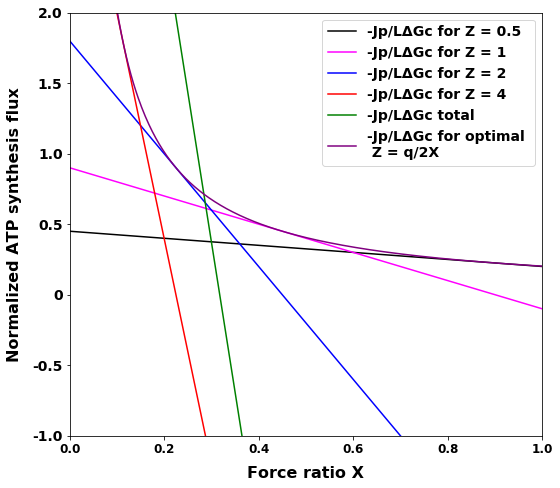

In [20]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 7), sharey=True)
# fig.subplots_adjust(bottom=0.6, right=0.8)

# formatter = matplotlib.ticker.FormatStrFormatter('%1.3f')#This one is used to set the accurate of y axis

ax.plot(figure_S6["X"],figure_S6["-Jp/LΔGc for Z = 0.5"],color='black',label = "-Jp/LΔGc for Z = 0.5")
ax.plot(figure_S6["X"],figure_S6["-Jp/LΔGc for Z = 1"],color='magenta',label = "-Jp/LΔGc for Z = 1")
ax.plot(figure_S6["X"],figure_S6["-Jp/LΔGc for Z = 2"],color='blue',label = "-Jp/LΔGc for Z = 2")
ax.plot(figure_S6["X"],figure_S6["-Jp/LΔGc for Z = 4"],color='red',label = "-Jp/LΔGc for Z = 4")
ax.plot(figure_S6["X"],figure_S6["-Jp/LΔGc total"],color='green',label = "-Jp/LΔGc total")
ax.plot(figure_S6["X"],figure_S6["-Jp/LΔGc for Optimal Z = q/2X"],color='purple',label = "-Jp/LΔGc for optimal \n Z = q/2X")

ax.legend(prop={"size":14}, loc='upper right', borderaxespad=0.5)

ax.set_yticklabels(["-1.0","-0.5","0","0.5","1.0","1.5","2.0"],fontsize = 14,fontweight = "bold")
# ax1.xticks(fontsize = 14,fontweight = "bold")
ax.set_ylim(-1.0, 2)
ax.set_xlim (0,1.0)
ax.set_xlabel("Force ratio X", fontsize = 16, fontweight = "bold",labelpad=10)
ax.set_ylabel("Normalized ATP synthesis flux", fontsize = 16, fontweight = "bold",labelpad=10)

plt.tight_layout()
plt.savefig('../figures/Figure 2.png', dpi=300)
plt.show()

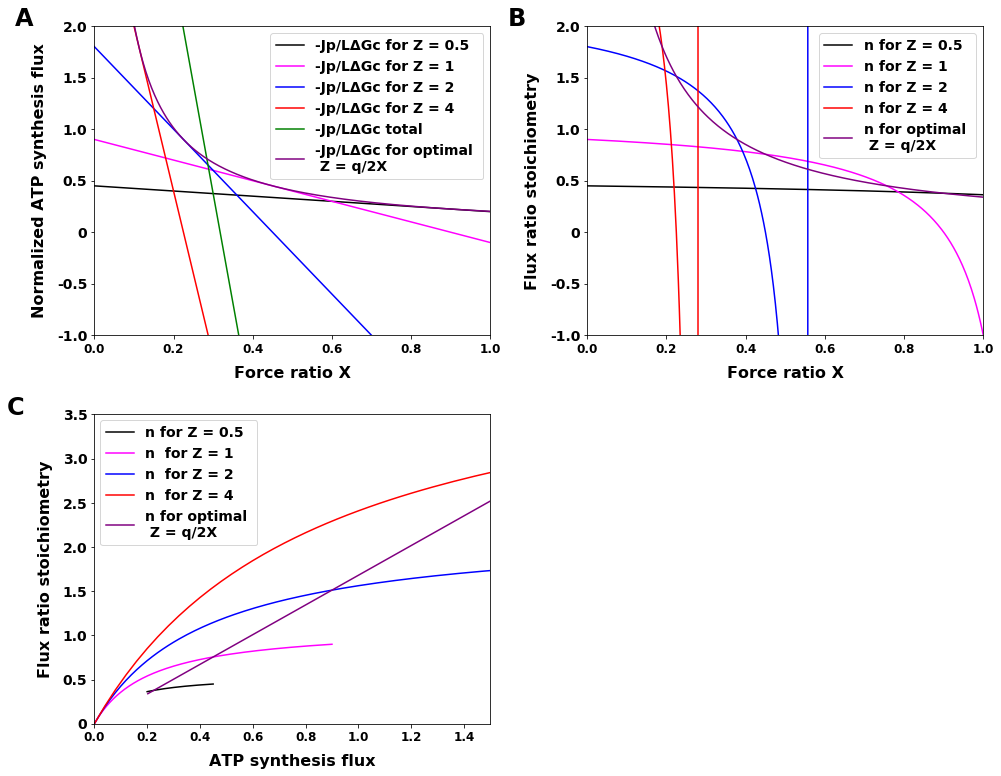

In [13]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size':14,'font.weight':"bold"})
fig = plt.figure(figsize = (14,11))

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1)


ax1.plot(figure_S6["X"],figure_S6["-Jp/LΔGc for Z = 0.5"],color='black',label = "-Jp/LΔGc for Z = 0.5")
ax1.plot(figure_S6["X"],figure_S6["-Jp/LΔGc for Z = 1"],color='magenta',label = "-Jp/LΔGc for Z = 1")
ax1.plot(figure_S6["X"],figure_S6["-Jp/LΔGc for Z = 2"],color='blue',label = "-Jp/LΔGc for Z = 2")
ax1.plot(figure_S6["X"],figure_S6["-Jp/LΔGc for Z = 4"],color='red',label = "-Jp/LΔGc for Z = 4")
ax1.plot(figure_S6["X"],figure_S6["-Jp/LΔGc total"],color='green',label = "-Jp/LΔGc total")
ax1.plot(figure_S6["X"],figure_S6["-Jp/LΔGc for Optimal Z = q/2X"],color='purple',label = "-Jp/LΔGc for optimal \n Z = q/2X")

ax1.legend(prop={"size":14}, loc='upper right', borderaxespad=0.5)
ax1.text(-0.2, 2, 'A',  fontsize = 24, color ="black")
ax1.set_yticklabels(["-1.0","-0.5","0","0.5","1.0","1.5","2.0"],fontsize = 14,fontweight = "bold")
# ax1.xticks(fontsize = 14,fontweight = "bold")
ax1.set_ylim(-1.0, 2)
ax1.set_xlim (0,1.0)
ax1.set_xlabel("Force ratio X", fontsize = 16, fontweight = "bold",labelpad=10)
ax1.set_ylabel("Normalized ATP synthesis flux", fontsize = 16, fontweight = "bold",labelpad=10)

ax2.plot(figure_S6["X"],figure_S6["-Jp/Jc for Z = 0.5"],color='black',label = "n for Z = 0.5")
ax2.plot(figure_S6["X"],figure_S6["-Jp/Jc for Z = 1"],color='magenta',label = "n for Z = 1")
ax2.plot(figure_S6["X"],figure_S6["-Jp/Jc for Z = 2"],color='blue',label = "n for Z = 2")
ax2.plot(figure_S6["X"],figure_S6["-Jp/Jc for Z = 4"],color='red',label = "n for Z = 4")
# ax.plot(figure_S6["X"],figure_S6["-Jp/Jc total"],color='green',label = "-Jp/Jc total")
ax2.plot(figure_S6["X"],figure_S6["-Jp/Jc for Optimal Z = q/2X"],color='purple', label = "n for optimal \n Z = q/2X")

ax2.legend(prop={"size":14}, loc='upper right', borderaxespad=0.5)
ax2.text(-0.2, 2, 'B',  fontsize = 24, color ="black")
ax2.set_yticklabels(["-1.0","-0.5","0","0.5","1.0","1.5","2.0"],fontsize = 14,fontweight = "bold")
# ax2.xticks(fontsize = 14,fontweight = "bold")
ax2.set_ylim(-1.0, 2)
ax2.set_xlim (0,1.0)
ax2.set_xlabel("Force ratio X", fontsize = 16, fontweight = "bold",labelpad=10)
ax2.set_ylabel("Flux ratio stoichiometry", fontsize = 16, fontweight = "bold",labelpad=10)


ax3.plot(figure_S6["-Jp/LΔGc for Z = 0.5"],figure_S6["-Jp/Jc for Z = 0.5"],color='black',label = "n for Z = 0.5")
ax3.plot(figure_S6["-Jp/LΔGc for Z = 1"],figure_S6["-Jp/Jc for Z = 1"],color='magenta',label = "n  for Z = 1")
ax3.plot(figure_S6["-Jp/LΔGc for Z = 2"],figure_S6["-Jp/Jc for Z = 2"],color='blue',label = "n  for Z = 2")
ax3.plot(figure_S6["-Jp/LΔGc for Z = 4"],figure_S6["-Jp/Jc for Z = 4"],color='red',label = "n  for Z = 4")
ax3.plot(figure_S6["-Jp/LΔGc for Optimal Z = q/2X"],figure_S6["-Jp/Jc for Optimal Z = q/2X"],color='purple',label = "n for optimal \n Z = q/2X")

ax3.legend(prop={"size":14}, loc='upper left', borderaxespad=0.4)
ax3.text(-0.33, 3.5, 'C',  fontsize = 24, color ="black")
ax3.set_yticklabels(["0","0.5","1.0","1.5","2.0","2.5","3.0","3.5"],fontsize = 14,fontweight = "bold")
# ax3.xticks(fontsize = 14,fontweight = "bold")
ax3.set_ylim(0,3.5)
ax3.set_xlim (0,1.5)
ax3.set_xlabel("ATP synthesis flux", fontsize = 16, fontweight = "bold",labelpad=10)
ax3.set_ylabel("Flux ratio stoichiometry", fontsize = 16, fontweight = "bold",labelpad=10)
plt.tight_layout()

plt.savefig('../figures/Figure S6.png', dpi=300)
plt.show()

## Figure S7

In [7]:
x = np.linspace(0,1,401)
figure_S7 = pd.DataFrame({"X":x})
figure_S7["-Jp/LΔGc φ = 1"] = 0
figure_S7["-Jp/LΔGc φ = 0.375"] = 0
figure_S7["-Jp/LΔGc φ = 0.25"] = 0
figure_S7["-Jp/LΔGc φ = 0"] = 0

figure_S7["n φ = 1"] = 0
figure_S7["n φ = 0.375"] = 0
figure_S7["n φ = 0.25"] = 0
figure_S7["n φ = 0"] = 0

figure_S7["n/(-Jp/LΔGc) φ = 1"] = 0
figure_S7["n/(-Jp/LΔGc) φ = 0.375"] = 0
figure_S7["n/(-Jp/LΔGc) φ = 0.25"] = 0
figure_S7["n/(-Jp/LΔGc) φ = 0"] = 0

φ1 = 1
φ2 =0.375
φ3=0.25
φ4=0
n1 = 1
n2 = 3

for i in range(len(figure_S7)):
    # The formula -Jp/(L∆Gc)= (1-φ)∙n1∙(1-n1∙X)+φ∙n2-φ∙(n2 )^2∙X was used for calculation of -Jp/(L∆Gc).
    figure_S7["-Jp/LΔGc φ = 1"].iloc[i] = (1-φ1)*n1*(1-n1*figure_S7["X"].iloc[i]) + φ1*n2*(1-n2*figure_S7["X"].iloc[i])
    figure_S7["-Jp/LΔGc φ = 0.375"].iloc[i] = (1-φ2)*n1*(1-n1*figure_S7["X"].iloc[i]) + φ2*n2*(1-n2*figure_S7["X"].iloc[i])
    figure_S7["-Jp/LΔGc φ = 0.25"].iloc[i] = (1-φ3)*n1*(1-n1*figure_S7["X"].iloc[i]) + φ3*n2*(1-n2*figure_S7["X"].iloc[i])
    figure_S7["-Jp/LΔGc φ = 0"].iloc[i] = (1-φ4)*n1*(1-n1*figure_S7["X"].iloc[i]) + φ4*n2*(1-n2*figure_S7["X"].iloc[i])
for i in range(len(figure_S7)):
    #n(X)=((1-φ)∙n_1∙(1-n_1∙X)+φ∙n_2∙(1-n_2∙X))/((1-φ)∙(1-n_1∙X)+φ∙(1-n_2∙X) )
    figure_S7["n φ = 1"].iloc[i] = ((1-φ1)*n1*(1-n1*figure_S7["X"].iloc[i]) + φ1*n2*(1-n2*figure_S7["X"].iloc[i]))/((1-φ1)*(1-n1*figure_S7["X"].iloc[i])+φ1*(1-n2*figure_S7["X"].iloc[i]))
    figure_S7["n φ = 0.375"].iloc[i] = ((1-φ2)*n1*(1-n1*figure_S7["X"].iloc[i]) + φ2*n2*(1-n2*figure_S7["X"].iloc[i]))/((1-φ2)*(1-n1*figure_S7["X"].iloc[i])+φ2*(1-n2*figure_S7["X"].iloc[i]))
    figure_S7["n φ = 0.25"].iloc[i] = ((1-φ3)*n1*(1-n1*figure_S7["X"].iloc[i]) + φ3*n2*(1-n2*figure_S7["X"].iloc[i]))/((1-φ3)*(1-n1*figure_S7["X"].iloc[i])+φ3*(1-n2*figure_S7["X"].iloc[i]))
    figure_S7["n φ = 0"].iloc[i] = ((1-φ4)*n1*(1-n1*figure_S7["X"].iloc[i]) + φ4*n2*(1-n2*figure_S7["X"].iloc[i]))/((1-φ4)*(1-n1*figure_S7["X"].iloc[i])+φ4*(1-n2*figure_S7["X"].iloc[i]))

C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\ipykernel_launcher.py:36 RuntimeWarning: invalid value encountered in double_scalars


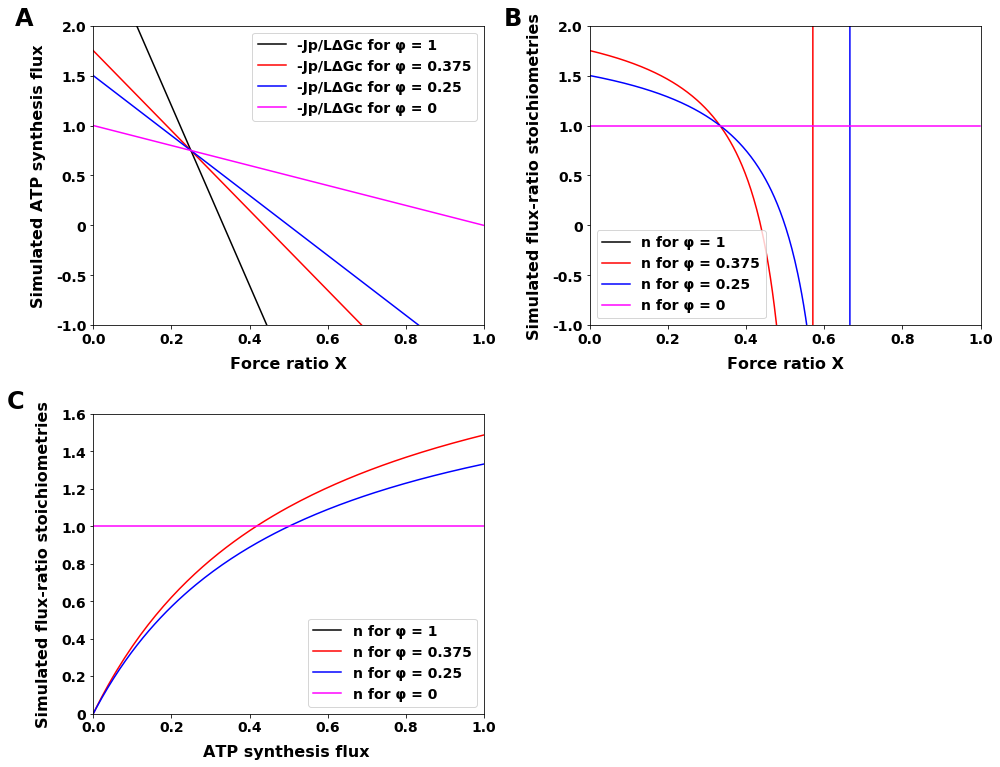

In [8]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size':14,'font.weight':"bold"})
fig = plt.figure(figsize = (14,11))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1)

ax1.plot(figure_S7["X"],figure_S7["-Jp/LΔGc φ = 1"],color='black',label = "-Jp/LΔGc for φ = 1")
ax1.plot(figure_S7["X"],figure_S7["-Jp/LΔGc φ = 0.375"],color='red',label = "-Jp/LΔGc for φ = 0.375")
ax1.plot(figure_S7["X"],figure_S7["-Jp/LΔGc φ = 0.25"],color='blue',label = "-Jp/LΔGc for φ = 0.25")
ax1.plot(figure_S7["X"],figure_S7["-Jp/LΔGc φ = 0"],color='magenta',label = "-Jp/LΔGc for φ = 0")

ax1.legend(prop={"size":14}, loc='upper right', borderaxespad=0.5)
ax1.text(-0.2, 2, 'A',  fontsize = 24, color ="black")
ax1.set_yticklabels(["-1.0","-0.5","0","0.5","1.0","1.5","2.0"],fontsize = 14,fontweight = "bold")
# ax1.xticks(fontsize = 14,fontweight = "bold")
ax1.set_ylim(-1.0, 2)
ax1.set_xlim (0,1.0)
ax1.set_xlabel("Force ratio X", fontsize = 16, fontweight = "bold",labelpad=10)
ax1.set_ylabel("Simulated ATP synthesis flux", fontsize = 16, fontweight = "bold",labelpad=10)

ax2.plot(figure_S7["X"],figure_S7["n φ = 1"],color='black',label = "n for φ = 1")
ax2.plot(figure_S7["X"],figure_S7["n φ = 0.375"],color='red',label = "n for φ = 0.375")
ax2.plot(figure_S7["X"],figure_S7["n φ = 0.25"],color='blue',label = "n for φ = 0.25")
ax2.plot(figure_S7["X"],figure_S7["n φ = 0"],color='magenta',label = "n for φ = 0")

ax2.legend(prop={"size":14}, loc='lower left', borderaxespad=0.5)
ax2.text(-0.22, 2, 'B',  fontsize = 24, color ="black")
ax2.set_yticklabels(["-1.0","-0.5","0","0.5","1.0","1.5","2.0"],fontsize = 14,fontweight = "bold")
# ax2.xticks(fontsize = 14,fontweight = "bold")
ax2.set_ylim(-1.0, 2)
ax2.set_xlim (0,1.0)
ax2.set_xlabel("Force ratio X", fontsize = 16, fontweight = "bold",labelpad=10)
ax2.set_ylabel("Simulated flux-ratio stoichiometries", fontsize = 16, fontweight = "bold",labelpad=10)


# formatter = matplotlib.ticker.FormatStrFormatter('%1.3f')#This one is used to set the accurate of y axis
ax3.yaxis.set_major_formatter(formatter)
ax3.plot(figure_S7["-Jp/LΔGc φ = 1"],figure_S7["n φ = 1"],color='black',label = "n for φ = 1")
ax3.plot(figure_S7["-Jp/LΔGc φ = 0.375"],figure_S7["n φ = 0.375"],color='red',label = "n for φ = 0.375")
ax3.plot(figure_S7["-Jp/LΔGc φ = 0.25"],figure_S7["n φ = 0.25"],color='blue',label = "n for φ = 0.25")
ax3.plot(figure_S7["-Jp/LΔGc φ = 0"],figure_S7["n φ = 0"],color='magenta',label = "n for φ = 0")

ax3.legend(prop={"size":14}, loc='lower right', borderaxespad=0.5)
ax3.text(-0.22, 1.63, 'C',  fontsize = 24, color ="black")
ax3.set_yticklabels(["0","0.2","0.4","0.6","0.8","1.0","1.2","1.4","1.6"],fontsize = 14,fontweight = "bold")
# plt.xticks(fontsize = 14,fontweight = "bold")
ax3.set_ylim(-0.0,1.6)
ax3.set_xlim (0,1.0)
ax3.set_xlabel("ATP synthesis flux ", fontsize = 16, fontweight = "bold",labelpad=10)
ax3.set_ylabel("Simulated flux-ratio stoichiometries", fontsize = 16, fontweight = "bold",labelpad=10)
plt.tight_layout()
plt.savefig('../figures/Figure S7.png', dpi=300)
plt.show()

## Figure S8

In [9]:
x = np.linspace(0,1,401)
figure_S8 = pd.DataFrame({"X":x})
figure_S8["-Jp n = 1"] = 0
figure_S8["-Jp n = 2"] = 0
figure_S8["-Jp n = 3"] = 0
figure_S8["-Jp n = 4"] = 0
figure_S8["-Jp total"] = 0
figure_S8["-Jp optimal gear shifting"] = 0
figure_S8["gear"] = 0
n1 = 1
n2 = 2
n3 = 3
n4 = 4

for i in range(len(figure_S8)):
    # The formula -Jp=(1-φ)∙n∙L∙∆Gc∙(1-n∙X) was used to calculate -Jp,here φ = 0, L= 1, ∆Gc = 1.
    figure_S8["-Jp n = 1"].iloc[i] = n1*(1-n1*figure_S8["X"].iloc[i])
    figure_S8["-Jp n = 2"].iloc[i] = n2*(1-n2*figure_S8["X"].iloc[i])
    figure_S8["-Jp n = 3"].iloc[i] = n3*(1-n3*figure_S8["X"].iloc[i])
    figure_S8["-Jp n = 4"].iloc[i] = n4*(1-n4*figure_S8["X"].iloc[i])
    figure_S8["-Jp total"].iloc[i] = figure_S8["-Jp n = 1"].iloc[i]+figure_S8["-Jp n = 2"].iloc[i]+figure_S8["-Jp n = 3"].iloc[i]+figure_S8["-Jp n = 4"].iloc[i]
    figure_S8["-Jp optimal gear shifting"].iloc[i] = max(figure_S8["-Jp n = 1"].iloc[i],figure_S8["-Jp n = 2"].iloc[i],figure_S8["-Jp n = 3"].iloc[i],figure_S8["-Jp n = 4"].iloc[i])
for i in range(len(figure_S8)):
    if i <65:
        figure_S8["gear"].iloc[i] = 4
    elif 65<=i<89:
        figure_S8["gear"].iloc[i] = 3
    elif 89<=i<136:
        figure_S8["gear"].iloc[i] = 2
    else:
        figure_S8["gear"].iloc[i] = 1

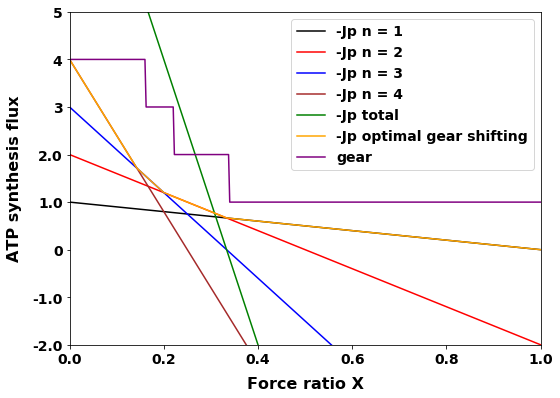

In [10]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6), sharey=True)
fig.subplots_adjust(bottom=0.6, right=0.8)

formatter = matplotlib.ticker.FormatStrFormatter('%1.3f')#This one is used to set the accurate of y axis
ax.yaxis.set_major_formatter(formatter)
ax.plot(figure_S8["X"],figure_S8["-Jp n = 1"],color='black',label = "-Jp n = 1")
ax.plot(figure_S8["X"],figure_S8["-Jp n = 2"],color='red',label = "-Jp n = 2")
ax.plot(figure_S8["X"],figure_S8["-Jp n = 3"],color='blue',label  = "-Jp n = 3")
ax.plot(figure_S8["X"],figure_S8["-Jp n = 4"],color='brown',label = "-Jp n = 4")
ax.plot(figure_S8["X"],figure_S8["-Jp total"],color='green',label = "-Jp total")
ax.plot(figure_S8["X"],figure_S8["-Jp optimal gear shifting"],color='orange', label = "-Jp optimal gear shifting")
ax.plot(figure_S8["X"],figure_S8["gear"],color='purple',label = "gear")

plt.legend(prop={"size":14}, loc='upper right', borderaxespad=0.5)

ax.set_yticklabels(["-2.0","-1.0","0","1.0","2.0","3","4","5"],fontsize = 14,fontweight = "bold")
plt.xticks(fontsize = 14,fontweight = "bold")
ax.set_ylim(-2.0,5.0)
ax.set_xlim (0,1.0)
ax.set_xlabel("Force ratio X", fontsize = 16, fontweight = "bold",labelpad=10)
ax.set_ylabel("ATP synthesis flux", fontsize = 16, fontweight = "bold",labelpad=10)
plt.tight_layout()
plt.savefig('../figures/Figure S8.png', dpi=300)
plt.show()

## Figure 3BCD

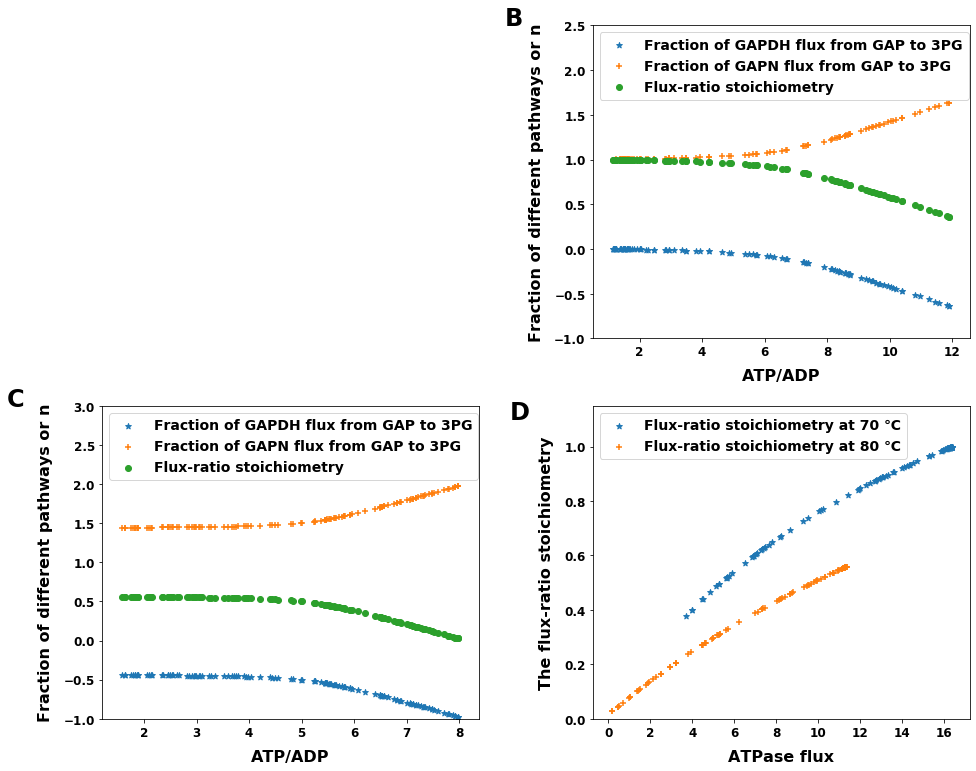

In [12]:
import matplotlib 
matplotlib.rcParams.update({'font.size':14,'font.weight':"bold"})
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
import pandas as pd

rawdata = pd.ExcelFile('../data/figure 2.xlsx')
fig = plt.figure(figsize = (14,11))
ax1 = plt.subplot2grid((2, 2), (0, 1), colspan=1)
ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=1)

figure_2b = pd.read_excel(rawdata, sheet_name = 'figure 2b')
figure_2b = figure_2b.drop_duplicates(subset= ['Values[GAPDH/(GAPDH +PGK)]','Values[GAPN/(GAPDH +PGK)]',"Values[(2GAPDH+GAPN)/PYK]"])
figure_2c = pd.read_excel(rawdata, sheet_name = 'figure 2c')
figure_2c = figure_2c.drop_duplicates(subset= ['Values[GAPDH/(GAPDH +PGK)]','Values[GAPN/(GAPDH +PGK)]',"Values[(2GAPDH+GAPN)/PYK]"])
# fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (8,12))
# fig, ax = plt.subplots()
ax1.scatter(figure_2b["Values[ATP/ADP ratio]"],figure_2b["Values[GAPDH/(GAPDH +PGK)]"],marker='*', label = "Fraction of GAPDH flux from GAP to 3PG")
ax1.scatter(figure_2b["Values[ATP/ADP ratio]"],figure_2b["Values[GAPN/(GAPDH +PGK)]"],marker= "+",label = "Fraction of GAPN flux from GAP to 3PG")
ax1.scatter(figure_2b["Values[ATP/ADP ratio]"],figure_2b["Values[(2GAPDH+GAPN)/PYK]"],marker= "o",label = "Flux-ratio stoichiometry ")
ax1.set_ylabel("Fraction of different pathways or n", fontsize = 16,labelpad = 10,fontweight = "bold")
ax1.set_xlabel("ATP/ADP", fontsize = 16,labelpad = 10,fontweight = "bold")
ax1.legend(prop={"size":14}, loc='upper left', borderaxespad=0.5)
ax1.set_ylim(-1,2.5)
ax1.text(-2.3, 2.5, 'B',  fontsize = 24, color ="black")
ax2.scatter(figure_2c["Values[ATP/ADP ratio]"],figure_2c["Values[GAPDH/(GAPDH +PGK)]"],marker='*', label = "Fraction of GAPDH flux from GAP to 3PG")
ax2.scatter(figure_2c["Values[ATP/ADP ratio]"],figure_2c["Values[GAPN/(GAPDH +PGK)]"],marker= "+",label = "Fraction of GAPN flux from GAP to 3PG")
ax2.scatter(figure_2c["Values[ATP/ADP ratio]"],figure_2c["Values[(2GAPDH+GAPN)/PYK]"],marker= "o",label = "Flux-ratio stoichiometry ")
ax2.set_ylabel("Fraction of different pathways or n", fontsize = 16,labelpad = 10,fontweight = "bold")
ax2.set_xlabel("ATP/ADP", fontsize = 16,labelpad = 10,fontweight = "bold")
ax2.legend(prop={"size":14}, loc='upper left', borderaxespad=0.5)
ax2.set_ylim(-1.0,3.0)
ax2.text(-0.6, 3, 'C',  fontsize = 24, color ="black")

ax3.scatter(figure_2b["(Atpase).Flux"],figure_2b["Values[(2GAPDH+GAPN)/PYK]_new"],marker= "*",label = "Flux-ratio stoichiometry at 70 ℃")
ax3.scatter(figure_2c["(Atpase).Flux"],figure_2c["Values[(2GAPDH+GAPN)/PYK]_new"],marker= "+",label = "Flux-ratio stoichiometry at 80 ℃")
ax3.set_ylabel("The flux-ratio stoichiometry", fontsize = 16,labelpad = 10,fontweight = "bold")
ax3.set_xlabel("ATPase flux", fontsize = 16,labelpad = 10,fontweight = "bold")

ax3.legend(prop={"size":14}, loc='upper left', borderaxespad=0.5)
ax3.set_ylim(0,1.15)
ax3.text(-4.7, 1.1, 'D',  fontsize = 24, color ="black")
plt.tight_layout()
plt.savefig('../figures/figure2bc.png', dpi=600)
plt.show()